In [165]:
#Data Explore
import pandas as pd
df = pd.read_csv('cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [166]:
# Preprocessing the data
   # One hot encoding

df = pd.get_dummies(df)
bool_col = df.select_dtypes(include = ['bool']).columns
df[bool_col] = df[bool_col].astype(int)
print(df)

    Car_ID  Year  Kilometers_Driven  Mileage  Engine  Power  Seats    Price  \
0        1  2018              50000       15    1498    108      5   800000   
1        2  2019              40000       17    1597    140      5  1000000   
2        3  2017              20000       10    4951    395      4  2500000   
3        4  2020              30000       23    1248     74      5   600000   
4        5  2016              60000       18    1999    194      5   850000   
..     ...   ...                ...      ...     ...    ...    ...      ...   
95      96  2019              22000       16    1950    191      5  2900000   
96      97  2017              38000       13    2755    171      7  1400000   
97      98  2018              26000       18    1497    121      5   750000   
98      99  2019              24000       17    1497    113      5   850000   
99     100  2020              18000       20    1199     85      5   600000   

    Brand_Audi  Brand_BMW  ...  Model_X5  Model_XUV

In [167]:
# REMOVING UNNECESSARY COLUMNS
y = df['Price']
x = df.drop('Price', axis = 1)
x = x.drop('Car_ID', axis = 1)
x = x.drop('Year', axis = 1)
    

In [168]:
# NORMALISATION

for col in x.columns:
    x[col] = x[col] / x[col].abs().max()

In [169]:
# SPLITTING DATA INTO TEST AND TRAIN DATA

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)


In [182]:
#CREATING LINEAR REGRESSION CLASS 
import numpy as np
class LinearRegression:
    def __init__(self, iter: int = 10000, lr: int = 0.1) -> None:
        self.iter = iter
        self.lr = lr
        self.w = None
        self.b = None
        
    def fit(self, x, y):
        num_samples, num_features = x.shape
        self.w = np.random.rand(num_features)
        self.b = 0
        
        for i in range(self.iter):
            y_pred = np.dot(x, self.w) + self.b
            
            dw = np.dot(x.T, y_pred - y)/ num_samples
            db =  np.sum(y_pred - y)/ num_samples
            self.w = self.w - ( dw * self.lr)
            self.b = self.b - ( db * self.lr)
            
    def predict(self, x):
        return np.dot(x, self.w) + self.b
            

In [183]:
# RUNNING MODEL ON DATA 

model  = LinearRegression()
model.fit(x_train, y_train)
p = model.predict(x_test)


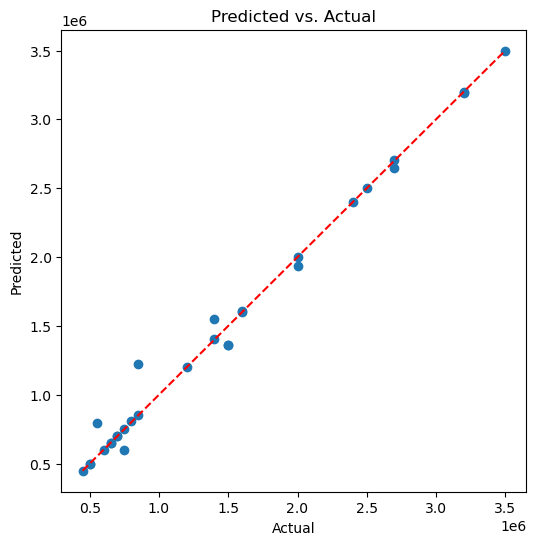

In [184]:
# GRAPHICAL REPRESENTATION AND COMPARING WITH TEST DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(y_test, p)
plt.plot([min(p), max(p)], [min(p), max(p)], 'r--') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual')
plt.show()